In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('data/sber_data.csv', sep=',')
# display(sber_data['metro_min_walk'].head(15))
# eco = sber_data.groupby(by='ecology', as_index=False)['price_doc'].mean()
# jointplot = sns.jointplot(
#     data=sber_data, 
#     x='kremlin_km', 
#     y='price_doc',
#     xlim = (0, 80),
#     ylim = (0, 1e8),
#     height=8,
# )

0     13.575119
1      7.620630
2     17.351515
3     11.565624
4      8.266305
5     18.378170
6     12.322993
7     11.527788
8     14.742289
9      4.755297
10    14.860185
11    27.678043
12    19.479949
13    14.576476
14     7.081564
Name: metro_min_walk, dtype: float64

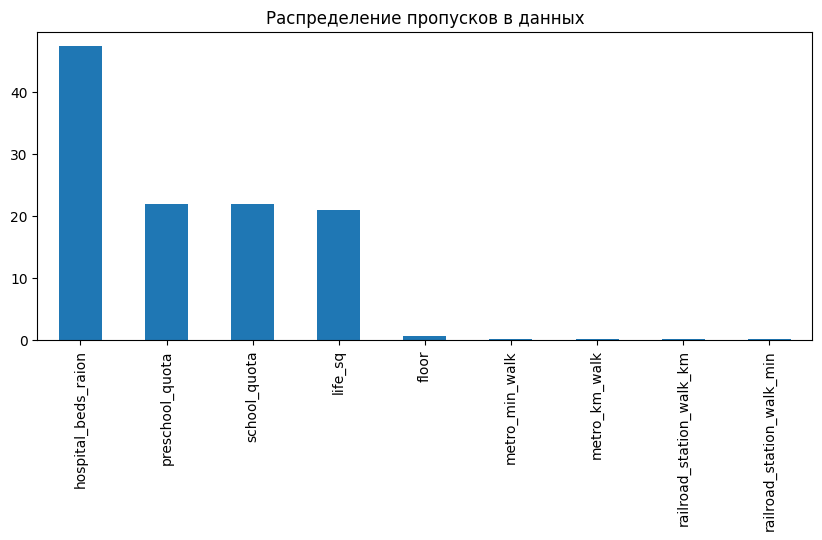

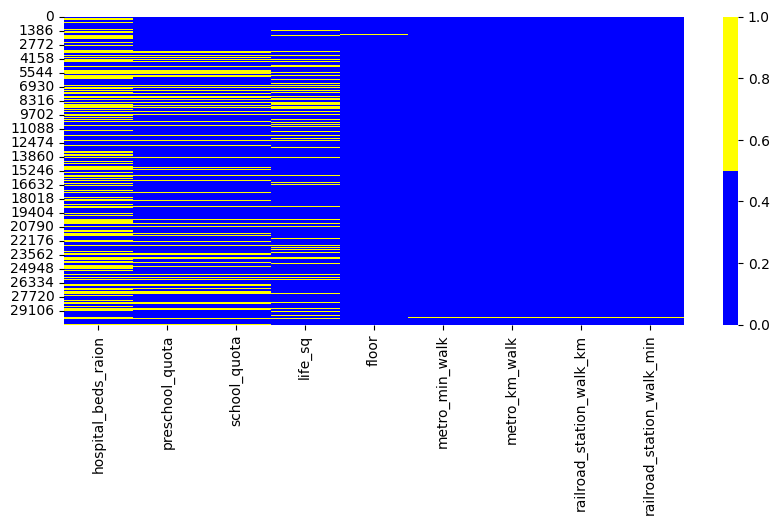

In [30]:
cols_null = sber_data.isnull().mean()*100
cols_with_null = cols_null[cols_null > 0].sort_values(ascending=False)
# display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [34]:
drop = sber_data.copy()
thresh = drop.shape[0]*0.7
drop = drop.dropna(thresh=thresh, axis=1)
drop = drop.dropna(how='any', axis=0)
display(drop.shape)

(20888, 60)

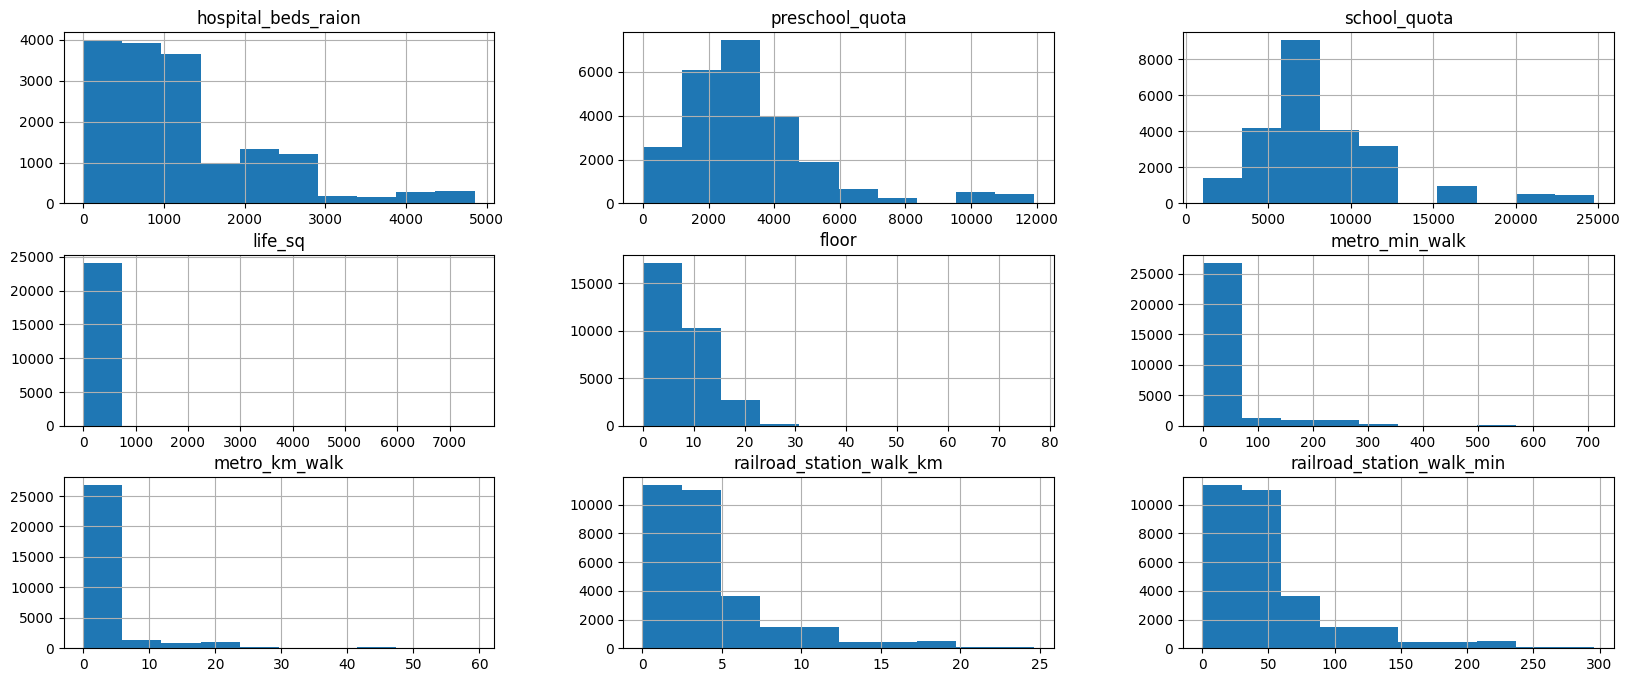

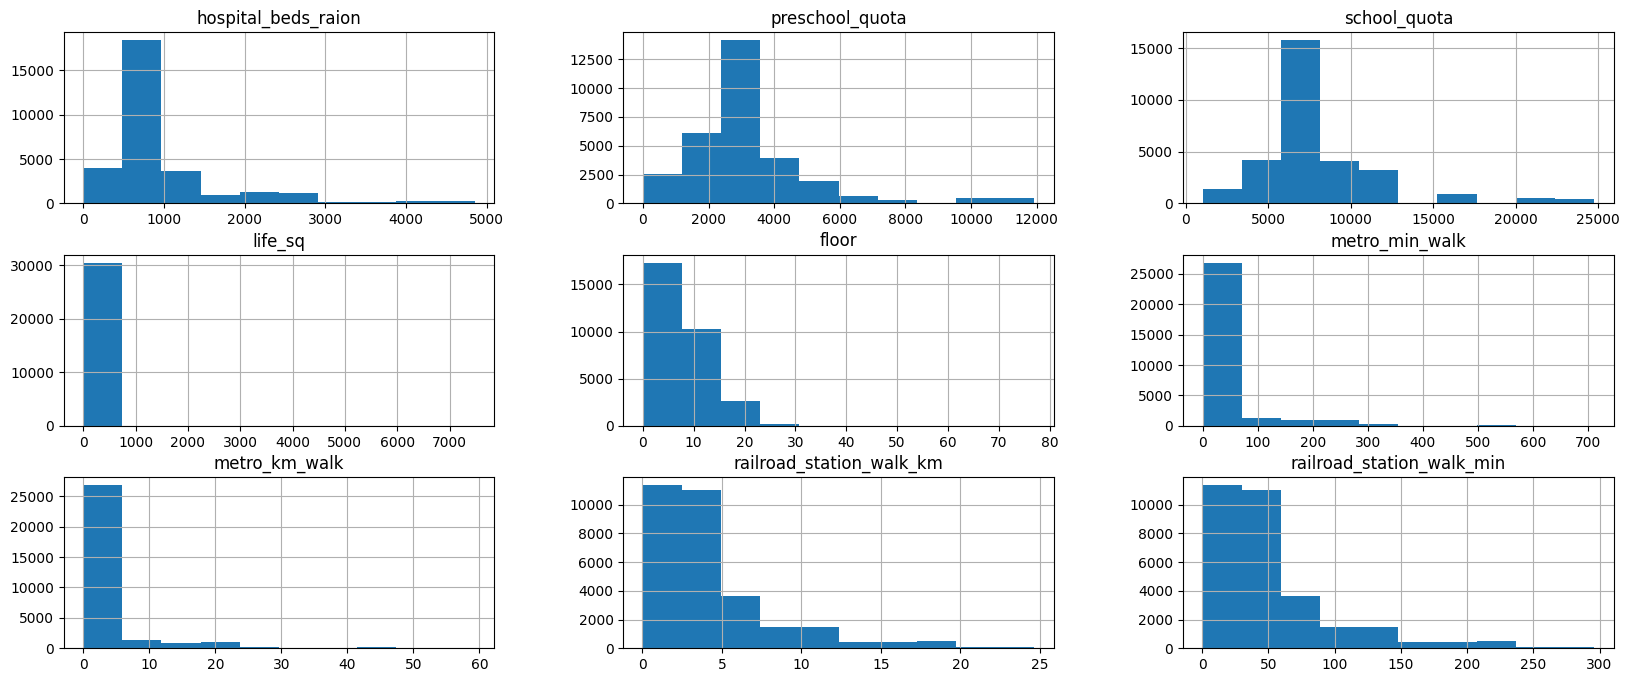

In [41]:
sber_data[cols].hist(figsize=(20,8));
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
# fill_data.isnull().mean()

cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

In [42]:
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
display(combine_data.shape)

(26800, 60)

In [84]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 92


In [76]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
display(outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3))


(          id  full_sq  life_sq  floor             sub_area  preschool_quota  \
 12742  12745      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 14426  14429       70     42.0    3.0   Poselenie Kievskij              NaN   
 14685  14688      167      NaN    1.0  Poselenie Rogovskoe              NaN   
 14729  14732      135      NaN    1.0  Poselenie Rogovskoe              NaN   
 14895  14898      167      NaN    1.0  Poselenie Rogovskoe              NaN   
 15868  15871      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 15902  15905      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 16790  16793      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 17010  17013      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 17059  17062      134      NaN    1.0  Poselenie Rogovskoe              NaN   
 17396  17399      134    134.0    1.0  Poselenie Rogovskoe              NaN   
 17404  17407      134    134.0    1.0  

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
96,97,30,18.0,1.0,Juzhnoe Tushino,2707.0,3,6340.0,4,0,...,0.973256,0.922550,0.295969,1.310095,1.937922,14.798469,11.894650,satisfactory,0,500000
216,217,60,32.0,16.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0.471411,0.700815,0.335913,1.419022,0.430986,3.857832,3.837523,satisfactory,1,360000
634,635,70,49.0,16.0,Matushkino,2080.0,3,3885.0,4,0,...,0.516682,4.295348,0.341269,2.219584,1.757142,2.789512,2.370084,no data,0,340000
743,744,37,23.0,4.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,0.280032,1.799739,0.361137,1.387727,1.391221,4.556467,4.541631,poor,0,500000
854,855,80,45.0,13.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.286789,1.669494,0.602358,3.516423,0.730361,8.709119,7.290957,good,0,472249
858,859,78,0.0,2.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.102981,1.951559,0.134515,3.225180,1.662512,8.717367,6.793669,good,0,552312
1149,1150,35,21.0,8.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.165038,0.519850,0.764969,1.259386,0.937291,6.239469,3.667416,poor,0,500000
1167,1168,38,23.0,9.0,Beskudnikovskoe,2757.0,5,7327.0,5,0,...,0.621834,0.612635,0.347734,1.275573,1.273114,9.947039,7.224543,poor,0,190000
1169,1170,47,31.0,7.0,Savelki,1065.0,3,4674.0,3,0,...,0.933860,5.490137,0.378393,1.050189,1.053570,1.899959,3.735541,no data,0,200000
1262,1264,66,36.0,12.0,Mitino,6839.0,9,17063.0,10,0,...,0.610012,0.907285,0.284686,0.562280,0.550989,15.907540,15.005953,good,0,354289


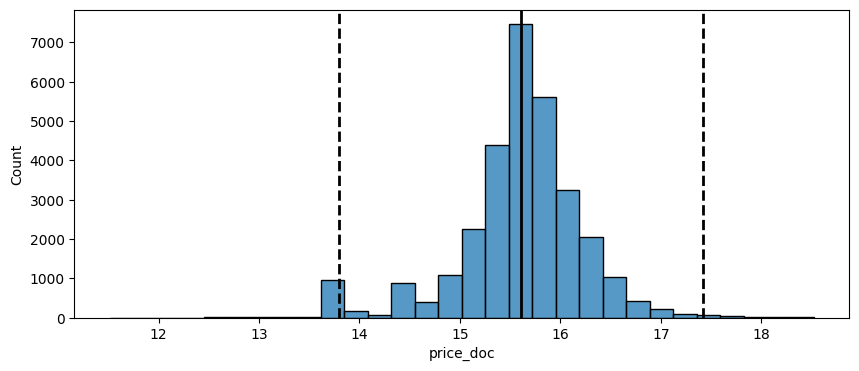

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
log_pr = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_pr, bins=30, ax=ax)

histplot.axvline(log_pr.mean(), color='k', lw=2)
histplot.axvline(log_pr.mean() - 3*log_pr.std(), color='k', ls='--', lw=2)
histplot.axvline(log_pr.mean() + 3*log_pr.std(), color='k', ls='--', lw=2)

outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
display(outliers)

In [85]:
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
